## Assigment 2

### Find out if any of the literary quality measures are a good predictor for the success of the story (in kudos) by performing simple linear regression on each of the variables. 

Pandas will be used for the data manipulation, matplotlib for visualasing the data, scikit-learn for linear regression and R-squared calculation, and scipy for the Shapiro-Wilk test:

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats

### Load the metadata

In [62]:
df = pd.read_csv("data_full.csv")

### Rewrite the name of the columns for better readability

In [64]:
df.rename(columns={
    "msttr": "MSTTR",
    "ari": "ARI",
    "fg": "FG",  
    "fe": "FE",  
    "words": "WordCount",  
    "comm": "CommentCount",
    "num": "Kudos"
}, inplace=True)

print(df.columns) ## to check that the names were changed correctly for better understanding of the solutions

Index(['Kudos', 'MSTTR', 'ARI', 'FG', 'FE', 'WordCount', 'CommentCount'], dtype='object')


### Defining dependent and independent variables

In [65]:
dependent_variable = "Kudos"
independent_variables = ["MSTTR", "ARI", "FG", "FE", "WordCount", "CommentCount"]

#Extracting X and y
y = df[dependent_variable]


## Create the Scatterplots using matplotlib

### Scatterplots Kudos vs ARI/MSTTR/FG/FE/WordCount/CommentCount

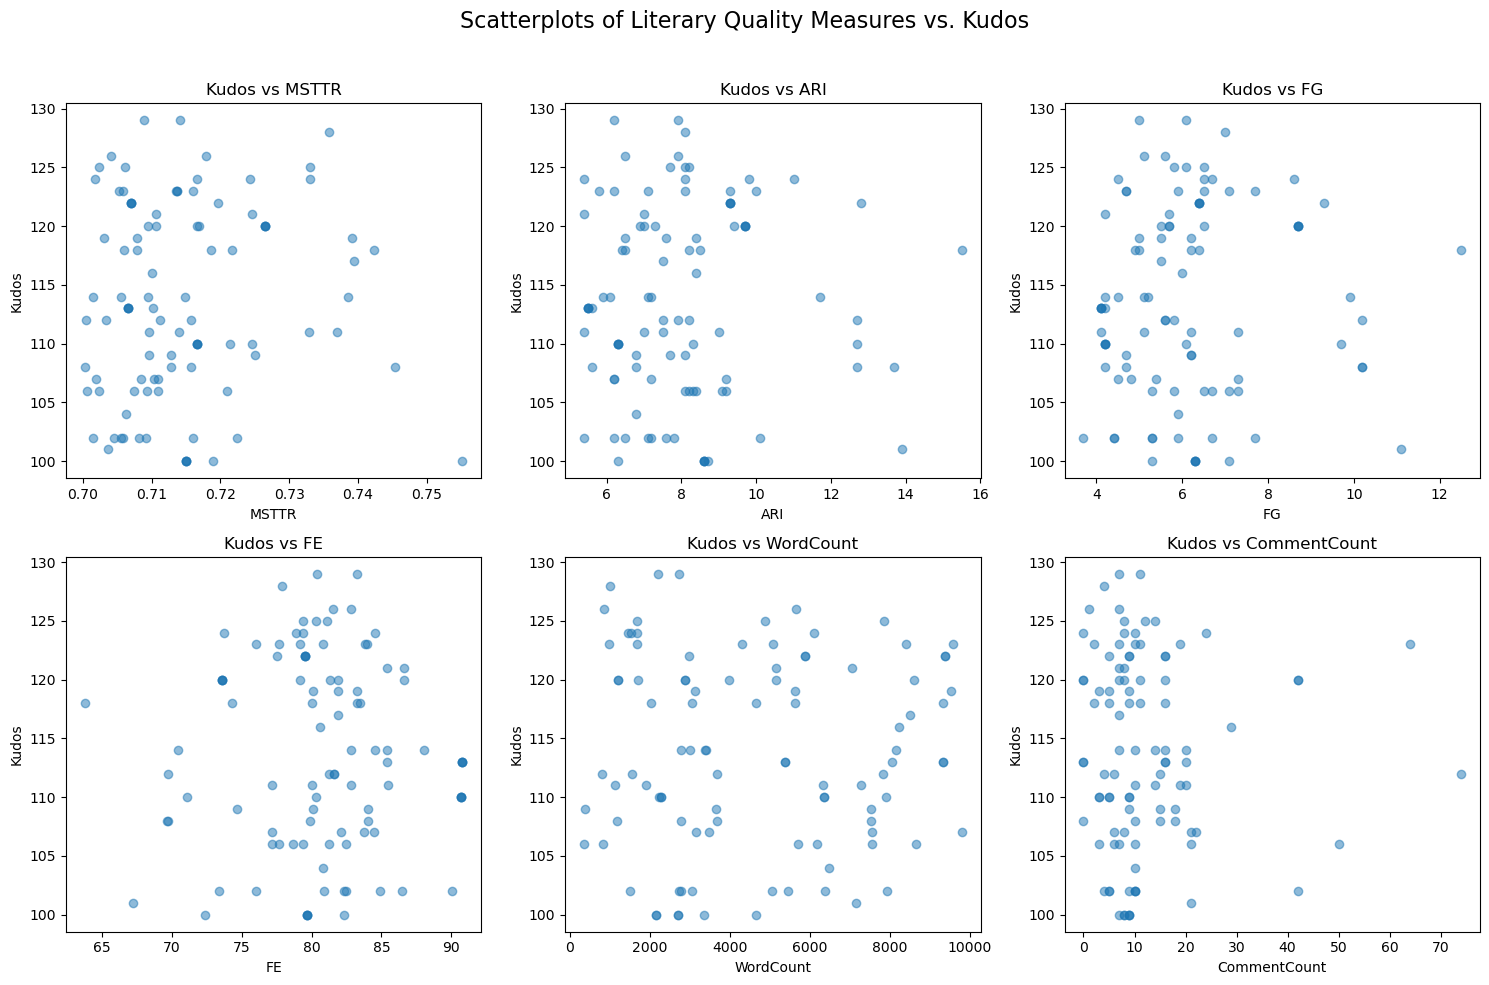

In [47]:
#Scatterplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Scatterplots of Literary Quality Measures vs. Kudos", fontsize=16)
for i, var in enumerate(independent_variables):
    row, col = divmod(i, 3)
    axes[row, col].scatter(df[var], y, alpha=0.5)
    axes[row, col].set_title(f"Kudos vs {var}")
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel("Kudos")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Perform Simple Linear Regression


### Contains, Shapiro-Wilk, Regression Plot,  Residual Plot

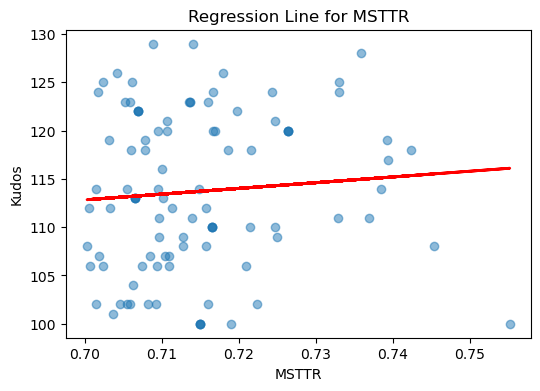

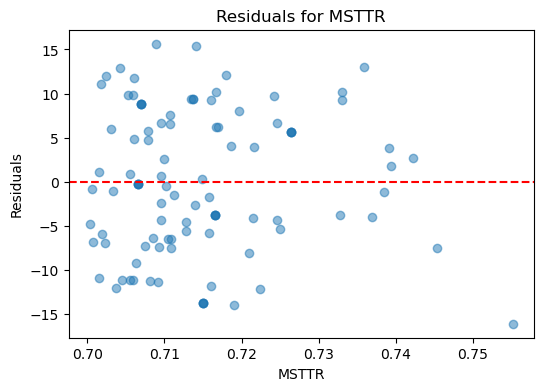

Variable: MSTTR
  Intercept: 71.2720
  Slope: 59.3649
  R2 Score: 0.0065
  Shapiro-Wilk W: 0.9642
  Shapiro-Wilk p-value: 8.1087e-03
----------------------------------------


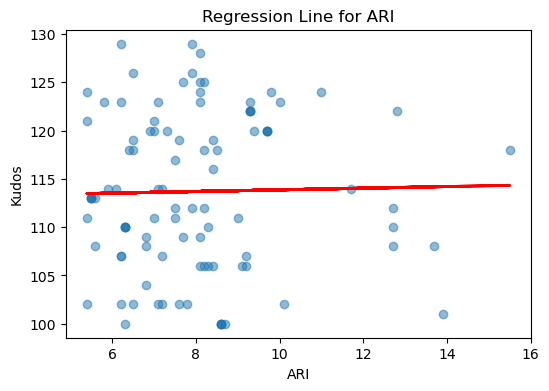

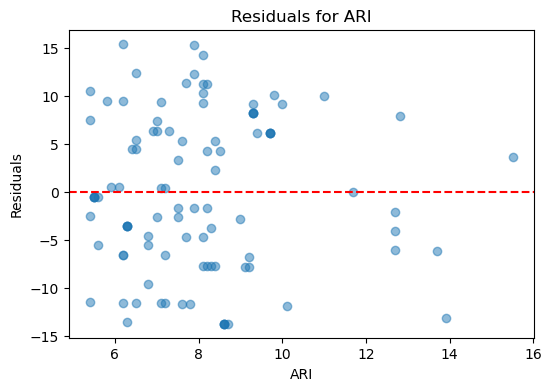

Variable: ARI
  Intercept: 113.0160
  Slope: 0.0852
  R2 Score: 0.0005
  Shapiro-Wilk W: 0.9561
  Shapiro-Wilk p-value: 2.1560e-03
----------------------------------------


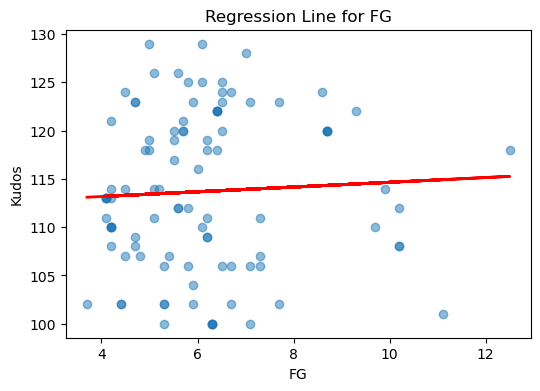

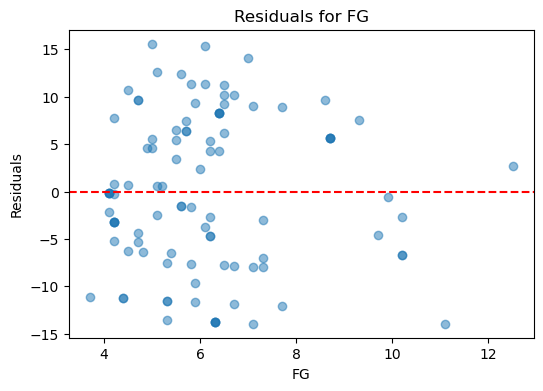

Variable: FG
  Intercept: 112.1934
  Slope: 0.2456
  R2 Score: 0.0027
  Shapiro-Wilk W: 0.9591
  Shapiro-Wilk p-value: 3.4914e-03
----------------------------------------


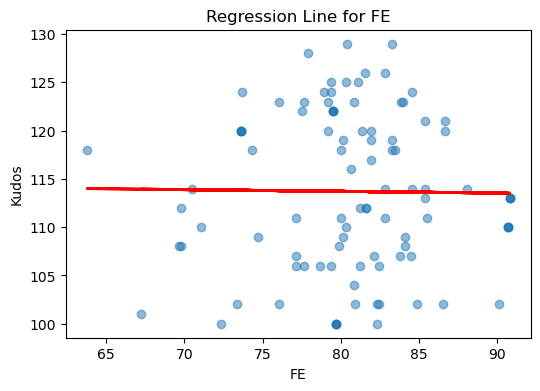

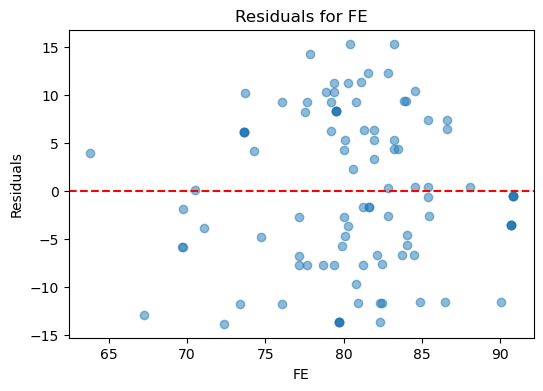

Variable: FE
  Intercept: 115.1165
  Slope: -0.0176
  R2 Score: 0.0001
  Shapiro-Wilk W: 0.9553
  Shapiro-Wilk p-value: 1.8983e-03
----------------------------------------


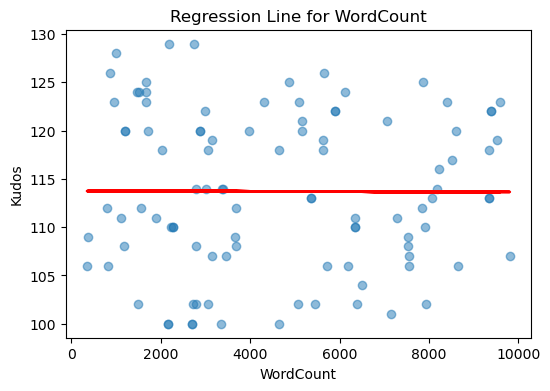

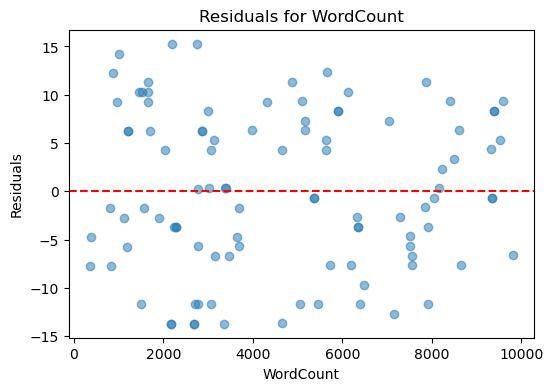

Variable: WordCount
  Intercept: 113.7431
  Slope: -0.0000
  R2 Score: 0.0000
  Shapiro-Wilk W: 0.9539
  Shapiro-Wilk p-value: 1.5073e-03
----------------------------------------


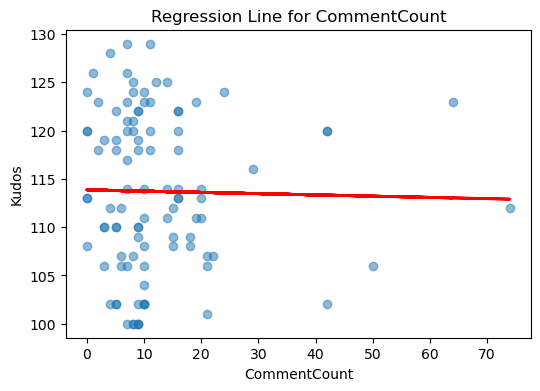

In [ ]:
# Loop to perform regression and analysis
for var in independent_variables:
    X = df[[var]]  # Independent variable (dataframe format required for sklearn)
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    residuals = y - y_pred
    shapiro_test = stats.shapiro(residuals) #to perform the Shapiro W test
    
    #Regression plots
    plt.figure(figsize=(6, 4))
    plt.scatter(df[var], y, alpha=0.5)
    plt.plot(df[var], y_pred, color='red', linewidth=2)
    plt.xlabel(var)
    plt.ylabel("Kudos")
    plt.title(f"Regression Line for {var}")
    plt.show()
    
    #Residual plots
    plt.figure(figsize=(6, 4))
    plt.scatter(df[var], residuals, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel(var)
    plt.ylabel("Residuals")
    plt.title(f"Residuals for {var}")
    plt.show()
    
    #Print all the results with Slope, Intercept, R2, Shapiro W Statistics, Shapiro p-value
    print(f"Variable: {var}")
    print(f"  Intercept: {model.intercept_:.4f}")
    print(f"  Slope: {model.coef_[0]:.4f}")
    print(f"  R2 Score: {r2:.4f}")
    print(f"  Shapiro-Wilk W: {shapiro_test.statistic:.4f}") 
    print(f"  Shapiro-Wilk p-value: {shapiro_test.pvalue:.4e}")
    print("-" * 40)
